In [70]:
from IPython.display import display, HTML, Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import make_scorer, accuracy_score, hamming_loss
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# 加载Yeast数据集

In [71]:
dataset = pd.read_csv('D:/c++_code/模式识别与机器学习/大作业/data/yeast.csv')
print("Dataset.shape: " + str(dataset.shape))

X = dataset.iloc[:, :103]
y = dataset.iloc[:, 103:]

print("X.shape: " + str(X.shape))
display(X.head())
print("y.shape: " + str(y.shape))
display(y.head())
print("Descriptive stats:")
X.describe()

Dataset.shape: (2417, 117)
X.shape: (2417, 103)


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834


y.shape: (2417, 14)


,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0


Descriptive stats:


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
count,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,...,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000
mean,0.001173,-0.000436,-0.000257,0.000265,0.001228,0.000475,0.001107,0.000420,0.001076,-0.000009,...,-0.000773,0.000464,-0.000515,0.000667,0.000324,-0.001483,-0.001047,-0.001539,0.000284,0.007605
std,0.097411,0.097885,0.097746,0.096969,0.096909,0.097306,0.097170,0.096803,0.096326,0.096805,...,0.093316,0.096684,0.096209,0.096635,0.096280,0.094369,0.096900,0.094211,0.093154,0.099368
min,-0.371146,-0.472632,-0.339195,-0.467945,-0.367044,-0.509447,-0.319928,-0.594498,-0.369712,-0.767128,...,-0.455191,-0.283594,-0.279408,-0.226420,-0.225374,-0.501572,-0.236589,-0.267052,-0.194079,-0.237752
25%,-0.053655,-0.058734,-0.057526,-0.057149,-0.058461,-0.060212,-0.058445,-0.062849,-0.063472,-0.065010,...,-0.054133,-0.056415,-0.056414,-0.059382,-0.058025,-0.053591,-0.063318,-0.059542,-0.054078,-0.077191
50%,0.003649,-0.003513,0.002892,-0.000153,0.005565,0.000321,0.006179,0.001436,0.003515,0.002432,...,-0.012893,-0.023595,-0.024313,-0.023059,-0.021942,-0.018216,-0.033623,-0.023519,-0.012007,0.022126
75%,0.057299,0.048047,0.061007,0.054522,0.066286,0.059908,0.068892,0.061418,0.064958,0.063096,...,0.027977,0.034937,0.036057,0.041430,0.035730,0.019583,0.038901,0.025408,0.028087,0.103185
max,0.520272,0.614114,0.353241,0.568960,0.307649,0.336971,0.351401,0.454591,0.419852,0.420876,...,0.609175,0.542867,0.547134,0.385928,0.540493,0.569250,0.509963,0.587358,0.700340,0.163431


# 划分训练集和测试集

In [72]:
X = (X-X.min())/(X.max()-X.min())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

X_train.shape: (1691, 103)
X_test.shape: (726, 103)
y_train.shape: (1691, 14)
y_test.shape: (726, 14)


# 二元相关性方法（Binary Relevance, BR）

In [73]:
class BinaryRelevanceClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier=LogisticRegression()):
        self.base_classifier=base_classifier

    def fit(self, X, y):
        self.models = []
       
        for label in list(y.columns):
            x_checked, y_checked = check_X_y(X, y[label])
            base_model = clone(self.base_classifier)
            basel_model = base_model.fit(x_checked, y_checked)
            self.models.append(base_model)

    def predict(self, X):
        check_is_fitted(self, ['models'])
        X = check_array(X)
        
        all_preds = pd.DataFrame()
        i=0
        preds = []
        
        for model in self.models:
            pred = model.predict(X)
            preds.append(pd.DataFrame({'Class'+ str(i+1): pred}))
            i+=1
        
        all_preds = pd.concat(preds, axis=1)
        return all_preds.to_numpy()
    


    def predict_proba(self,X):
        check_is_fitted(self, ['models'])
        X = check_array(X)
        
        all_preds = pd.DataFrame()
        i = 0
        
        for model in self.models:
            pred = model.predict_proba(X)
            all_preds['Class'+str(i+1)] = [one_prob[1] for one_prob in pred]
            i+=1
        
        return all_preds.to_numpy()

In [74]:
br_clf = BinaryRelevanceClassifier(LogisticRegression())
br_clf.fit(X_train, y_train)
y_pred = br_clf.predict(X_test)
print("y_pred.shape: " + str(y_pred.shape))

y_pred.shape: (726, 14)


In [75]:
def accuracy_score(y_test, y_pred):
    y_test = y_test.to_numpy()
    
    assert y_test.shape == y_pred.shape
    i=0
    scores = []
    
    # for each test sample
    while i < len(y_test):
        count=0
        for p, q in zip(y_test[i], y_pred[i]):
            if p == q:
                count += 1

        scores.append(count / y_pred.shape[1])
        i+=1 

    return round((sum(scores)/len(y_test)), 5)

In [76]:
print("BR方法预测准确率: " + str(accuracy_score(y_test, y_pred)))

BR方法预测准确率: 0.79181


## BR方法使用不同基分类器

In [77]:
cv_folds=5

param_grid ={'base_classifier': [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
                                 RandomForestClassifier(criterion='entropy'),
                                 LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()] }

tuned_model = GridSearchCV(BinaryRelevanceClassifier(), \
                            param_grid, scoring=make_scorer(accuracy_score), verbose = 2, n_jobs = -1, cv=cv_folds)
tuned_model.fit(X_train, y_train)

print("Best Parameters Found: ")
display(tuned_model.best_params_)
display(tuned_model.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters Found: 


{'base_classifier': DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2)}

nan

In [78]:
br_clf = BinaryRelevanceClassifier(LogisticRegression(max_iter=20000))
br_clf.fit(X_train, y_train)
y_pred = br_clf.predict(X_test)
print("y_pred.shape: " + str(y_pred.shape))

y_pred.shape: (726, 14)


In [79]:
print("使用最佳基分类器的BR方法预测准确率: " + str(accuracy_score(y_test, y_pred)))

使用最佳基分类器的BR方法预测准确率: 0.79181


In [80]:
# list of base models
base_models = [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
               RandomForestClassifier(criterion='entropy'),
               LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()]
base_model_names = ["Decision Tree", "Random Forest", "Logistic Regression", "GaussianNB", "kNN", "SVM"]

# store accuracy scores
br_clf_accuracies = dict()
# br_clfus_accuracies = dict()

# store F1 scores
br_clf_f1 = dict()
# br_clfus_f1 = dict()

br_clf_hamming_loss = dict()

i=0
for clf in base_models:
    # without undersampling
    br_clf = BinaryRelevanceClassifier(clf)
    br_clf.fit(X_train, y_train)
    br_y_pred = br_clf.predict(X_test)

    # 计算BR方法accuracy_score
    accuracy = accuracy_score(y_test, br_y_pred)
    br_clf_accuracies[base_model_names[i]] = accuracy

    # 计算BR方法f1_score
    y_pred_df = pd.DataFrame(br_y_pred)
    f1_score_br = metrics.f1_score(y_test, y_pred_df, average='macro')
    br_clf_f1[base_model_names[i]] = f1_score_br

    # 计算BR方法hamming_loss
    y_pred_df = pd.DataFrame(br_y_pred)
    hamming_loss_br = metrics.hamming_loss(y_test, y_pred_df)
    br_clf_hamming_loss[base_model_names[i]] = hamming_loss_br

    
    # # with undersampling
    # brus_clf = BinaryRelevanceClassifierUS(clf)
    # brus_clf.fit(X_train, y_train)
    # brus_y_pred = brus_clf.predict(X_test)
    
    # # find accuracy using custom accuracy function defined
    # accuracy_us = accuracy_score(y_test, brus_y_pred)
    # br_clfus_accuracies[base_model_names[i]] = accuracy_us
    
    # # find f1 score using sklearn
    # y_pred_df = pd.DataFrame(brus_y_pred)
    # f1_score_us = metrics.f1_score(y_test, y_pred_df, average='macro')
    # br_clfus_f1[base_model_names[i]] = f1_score_us
    
    i+=1

print("===================Accuracy Scores=====================")
print("Binary Relevance")
display(br_clf_accuracies)
# print("Binary Relevance with Under-Sampling")
# display(br_clfus_accuracies)

print("======================F1 Scores========================")
print("Binary Relevance")
display(br_clf_f1)
# print("Binary Relevance with Under-Sampling")
# display(br_clfus_f1)

print("======================Hamming Loss========================")
print("Binary Relevance")
display(br_clf_hamming_loss)

print("======================0-1 Loss========================")
br_clf_zero_one_loss = {model_name: 1 - accuracy for model_name, accuracy in br_clf_accuracies.items()}
print("Binary Relevance")
display(br_clf_zero_one_loss)

===================Accuracy Scores=====================
Binary Relevance


{'Decision Tree': 0.73101,
 'Random Forest': 0.80421,
 'Logistic Regression': 0.79181,
 'GaussianNB': 0.70268,
 'kNN': 0.78975,
 'SVM': 0.80421}

======================F1 Scores========================
Binary Relevance


{'Decision Tree': 0.3922958552961302,
 'Random Forest': 0.34957585646395845,
 'Logistic Regression': 0.34860582017157454,
 'GaussianNB': 0.4441966958169542,
 'kNN': 0.42152433224517327,
 'SVM': 0.3454431292116948}

======================Hamming Loss========================
Binary Relevance


{'Decision Tree': 0.26898858717040536,
 'Random Forest': 0.19578905942542307,
 'Logistic Regression': 0.2081857536402991,
 'GaussianNB': 0.2973238882329791,
 'kNN': 0.21025186934277842,
 'SVM': 0.19578905942542307}

======================0-1 Loss========================
Binary Relevance


{'Decision Tree': 0.26898999999999995,
 'Random Forest': 0.19579000000000002,
 'Logistic Regression': 0.20819,
 'GaussianNB': 0.29732000000000003,
 'kNN': 0.21025000000000005,
 'SVM': 0.19579000000000002}

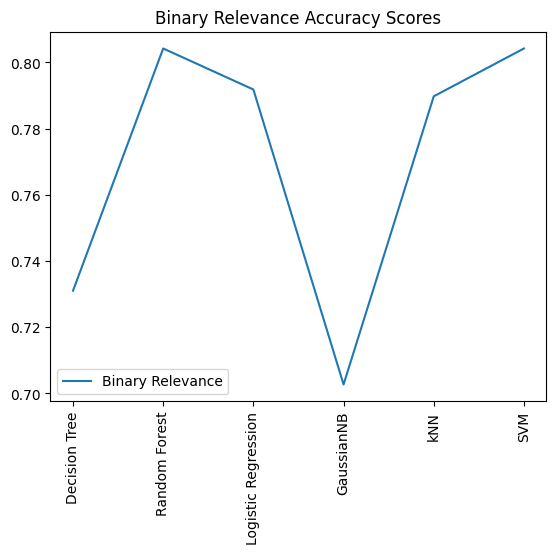

In [81]:
plt.plot(list(br_clf_accuracies.keys()), list(br_clf_accuracies.values()))
plt.xticks(rotation=90)
plt.title('Binary Relevance Accuracy Scores')
plt.legend(['Binary Relevance'])

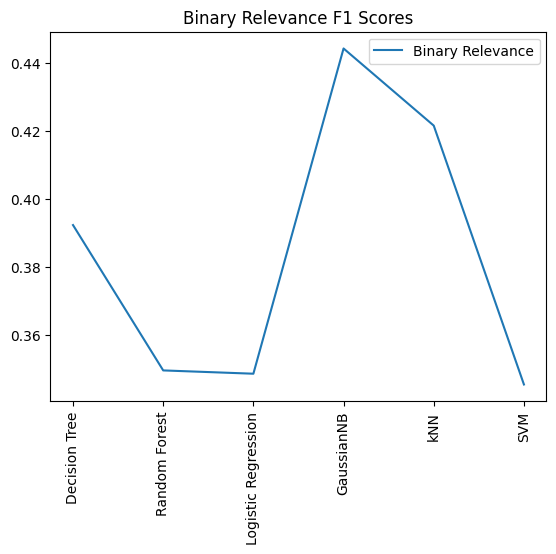

In [82]:
plt.plot(list(br_clf_f1.keys()), list(br_clf_f1.values()))
plt.xticks(rotation=90)
plt.title('Binary Relevance F1 Scores')
plt.legend(['Binary Relevance'])

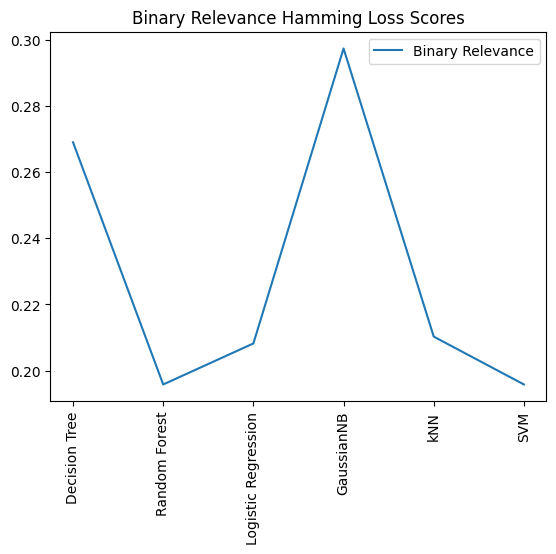

In [83]:
plt.plot(list(br_clf_hamming_loss.keys()), list(br_clf_hamming_loss.values()))
plt.xticks(rotation=90)
plt.title('Binary Relevance Hamming Loss Scores')
plt.legend(['Binary Relevance'])

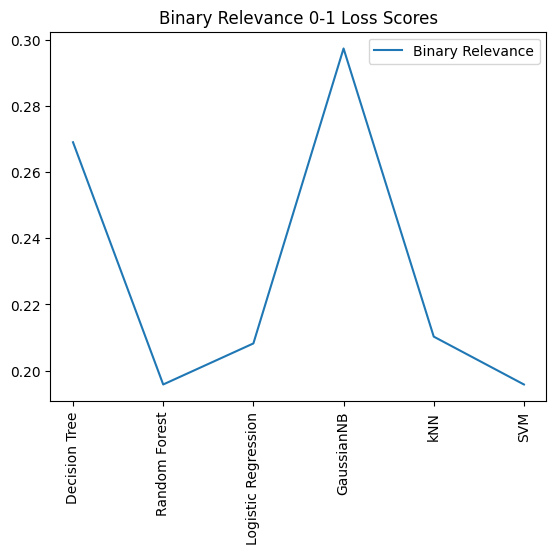

In [84]:
plt.plot(list(br_clf_zero_one_loss.keys()), list(br_clf_zero_one_loss.values()))
plt.xticks(rotation=90)
plt.title('Binary Relevance 0-1 Loss Scores')
plt.legend(['Binary Relevance'])

# 分类器链模型（Classifier Chains, CC）

In [85]:
class ClassifierChains(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier=LogisticRegression(max_iter=20000), order=None):

        self.base_classifier=base_classifier
        self.order = order

    def fit(self, X, y):

        if self.order is None:
            self.order = list(range(y.shape[1]))
        elif self.order == 'random':
            self.order = list(range(y.shape[1]))
            random.shuffle(self.order)
        else:
            if(len(self.order)==y.shape[1]):
                self.order = [o - 1 for o in self.order]
    
        
        self.models = [clone(self.base_classifier) for clf in range(y.shape[1])]

        X_joined = X.copy()
        
        for val in self.order:
            X_joined = pd.concat([X_joined, y['Class'+str(val+1)]], axis=1)

        for chain_index, model in enumerate(self.models):
            y_vals = y.loc[:, 'Class'+str(self.order[chain_index]+1)]
            t_X = X_joined.iloc[:, :(X.shape[1]+chain_index)]
            check_X_y(t_X, y_vals)
            model.fit(t_X, y_vals)

    def predict(self, X):
        
        check_is_fitted(self, ['models'])
        
        pred_chain = pd.DataFrame(columns=['Class'+str(o+1) for o in self.order])
        
        X_copy = X.copy()
        X_joined = X.copy()
        
        X_joined.reset_index(drop=True, inplace=True)
        X_copy.reset_index(drop=True, inplace=True)

        i=0
        
        for chain_index, model in enumerate(self.models):
            prev_preds = pred_chain.iloc[:, :chain_index]
            X_joined = pd.concat([X_copy, prev_preds], axis=1)
            pred = model.predict(X_joined)
            pred_chain['Class'+str(self.order[i]+1)] = pred
            i+=1

        pred_chain = pred_chain.loc[:, ['Class'+str(j+1) for j in range(0, len(self.order))]]
        return pred_chain.to_numpy()
    
    
    
    def predict_proba(self, X):
        check_is_fitted(self, ['models'])
        
        pred_chain = pd.DataFrame(columns=['Class'+str(o+1) for o in self.order])
        pred_probs = pd.DataFrame(columns=['Class'+str(o+1) for o in self.order])
        X_copy = X.copy()
        X_joined = X.copy()
        
        X_joined.reset_index(drop=True, inplace=True)
        X_copy.reset_index(drop=True, inplace=True)

        i=0
        
        for chain_index, model in enumerate(self.models):
            
            prev_preds = pred_chain.iloc[:, :chain_index]
            X_joined = pd.concat([X_copy, prev_preds], axis=1)
            pred = model.predict(X_joined)
            pred_proba = model.predict_proba(X_joined)
            pred_chain['Class'+str(self.order[i]+1)] = pred
            pred_probs['Class'+str(self.order[i]+1)] = [one_prob[1] for one_prob in pred_proba]
            i+=1

        pred_probs = pred_probs.loc[:, ['Class'+str(j+1) for j in range(0, len(self.order))]]
        return pred_probs.to_numpy()

In [86]:
cc = ClassifierChains(order=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
cc.fit(X_train, y_train)

In [87]:
cc_pred = cc.predict(X_test)

In [88]:
print("分类链的预测准确率" + str(accuracy_score(y_test, cc_pred)))

分类链的预测准确率0.78365


## CC方法使用不同基分类器

In [89]:
cv_folds=5

rand_orders = [list(range(1, y_test.shape[1]+1)) for i in list(range(1, 20))]

for lst in rand_orders:
    random.shuffle(lst)

rand_orders.append([1,2,3,4,5,6,7,8,9,10,11,12,13,14])

param_grid ={'base_classifier': [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
                                 RandomForestClassifier(criterion='entropy'),
                                 LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()],
            'order': rand_orders}

tuned_model = GridSearchCV(ClassifierChains(), \
                            param_grid, scoring=make_scorer(accuracy_score), verbose = 2, n_jobs = -1, cv=cv_folds)
tuned_model.fit(X_train, y_train)

print("Best Parameters Found: ")
display(tuned_model.best_params_)
display(tuned_model.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters Found: 


{'base_classifier': DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
 'order': [4, 12, 3, 6, 5, 10, 11, 1, 7, 13, 8, 9, 2, 14]}

nan

In [90]:
best = tuned_model.best_params_

In [91]:
cc = ClassifierChains(base_classifier=best['base_classifier'], order=best['order'])
cc.fit(X_train, y_train)

In [92]:
print("Accuracy of Classifier Chains - Best Model: " + str(accuracy_score(y_test, cc_pred)))

Accuracy of Classifier Chains - Best Model: 0.78365


In [93]:
# list of base models
base_models = [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
               RandomForestClassifier(criterion='entropy'),
               LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()]
base_model_names = ["Decision Tree", "Random Forest", "Logistic Regression", "GaussianNB", "kNN", "SVM"]

cc_accuracies = dict()
cc_f1 = dict()
cc_hammings = dict()
cc_01 = dict()

i=0
for clf in base_models:
    cc = ClassifierChains(clf, order=best['order'])
    cc.fit(X_train, y_train)
    cc_pred = cc.predict(X_test)
    # accuracy score
    accuracy = accuracy_score(y_test, cc_pred)
    cc_accuracies[base_model_names[i]] = accuracy
    # F1 score
    cc_f1_score = metrics.f1_score(y_test, pd.DataFrame(cc_pred), average='macro')
    cc_f1[base_model_names[i]] = cc_f1_score

    # Hamming loss
    cc_hamming_loss = metrics.hamming_loss(y_test, pd.DataFrame(cc_pred))
    cc_hammings[base_model_names[i]] = cc_hamming_loss
    
    # Zero-one loss
    cc_01_loss = metrics.zero_one_loss(y_test, pd.DataFrame(cc_pred))
    cc_01[base_model_names[i]] = cc_01_loss

    i+=1

print("====================Classifier Chains Accuracy====================")
display(cc_accuracies)
print("===================Classifier Chains F1 Scores====================")
display(cc_f1)
print("===================Classifier Chains Hamming Loss====================")
display(cc_hammings)
print("===================Classifier Chains Zero-one Loss====================")
display(cc_01)

====================Classifier Chains Accuracy====================


{'Decision Tree': 0.7137,
 'Random Forest': 0.80333,
 'Logistic Regression': 0.78109,
 'GaussianNB': 0.68703,
 'kNN': 0.78109,
 'SVM': 0.78503}

===================Classifier Chains F1 Scores====================


{'Decision Tree': 0.3761615998606419,
 'Random Forest': 0.36503453602001407,
 'Logistic Regression': 0.40216543436462215,
 'GaussianNB': 0.43848731367536714,
 'kNN': 0.4289365234439156,
 'SVM': 0.39746106211064475}

===================Classifier Chains Hamming Loss====================


{'Decision Tree': 0.28630460448642264,
 'Random Forest': 0.1966745375836285,
 'Logistic Regression': 0.2189098780007871,
 'GaussianNB': 0.31296733569460844,
 'kNN': 0.2189098780007871,
 'SVM': 0.21497441951987406}

===================Classifier Chains Zero-one Loss====================


{'Decision Tree': 0.9035812672176309,
 'Random Forest': 0.7947658402203857,
 'Logistic Regression': 0.803030303030303,
 'GaussianNB': 0.9063360881542699,
 'kNN': 0.7644628099173554,
 'SVM': 0.7920110192837466}

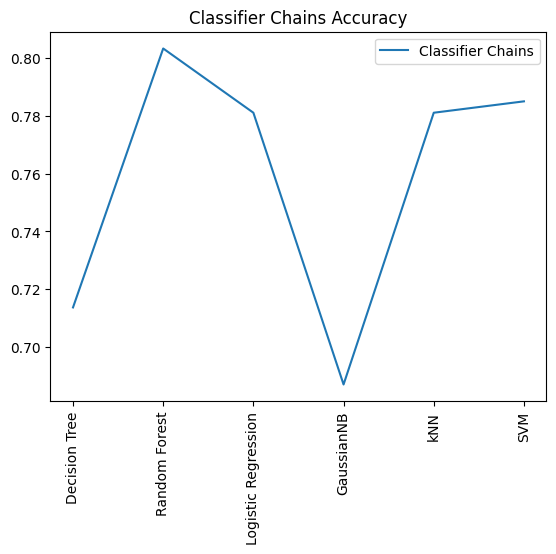

In [94]:
plt.plot(list(cc_accuracies.keys()), list(cc_accuracies.values()))
plt.xticks(rotation=90)
plt.title('Classifier Chains Accuracy')
plt.legend(['Classifier Chains'])

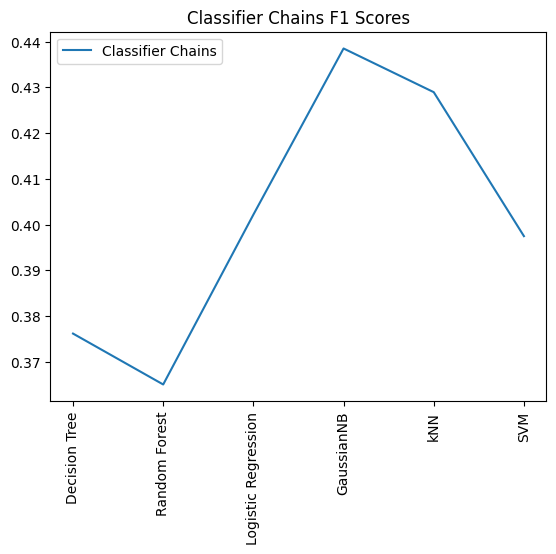

In [95]:
plt.plot(list(cc_f1.keys()), list(cc_f1.values()))
plt.xticks(rotation=90)
plt.title('Classifier Chains F1 Scores')
plt.legend(['Classifier Chains'])

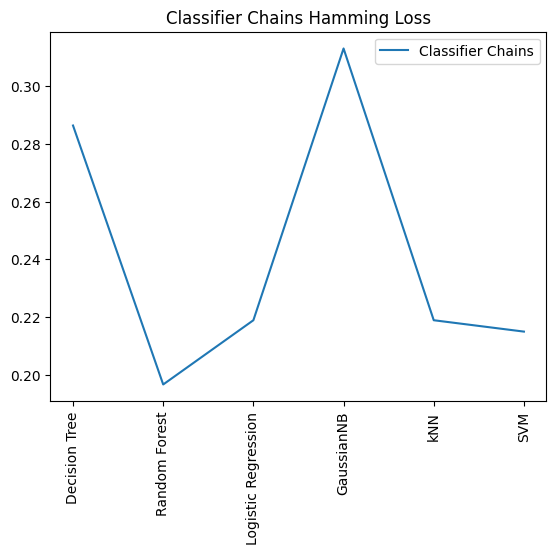

In [96]:
plt.plot(list(cc_hammings.keys()), list(cc_hammings.values()))
plt.xticks(rotation=90)
plt.title('Classifier Chains Hamming Loss')
plt.legend(['Classifier Chains'])

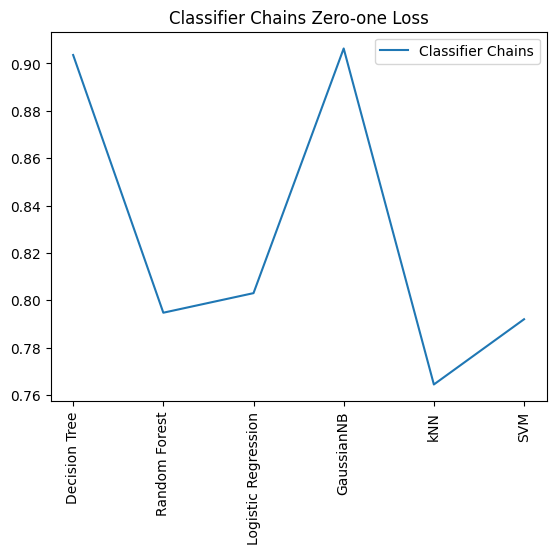

In [97]:
plt.plot(list(cc_01.keys()), list(cc_01.values()))
plt.xticks(rotation=90)
plt.title('Classifier Chains Zero-one Loss')
plt.legend(['Classifier Chains'])

# 对比BR方法和CC方法

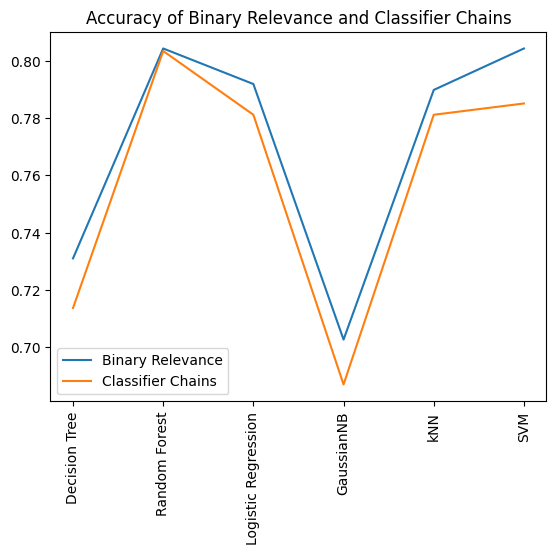

In [98]:
plt.plot(list(br_clf_accuracies.keys()), list(br_clf_accuracies.values()))
plt.plot(list(cc_accuracies.keys()), list(cc_accuracies.values()))
plt.xticks(rotation=90)
plt.title('Accuracy of Binary Relevance and Classifier Chains')
plt.legend(['Binary Relevance', 'Classifier Chains'])

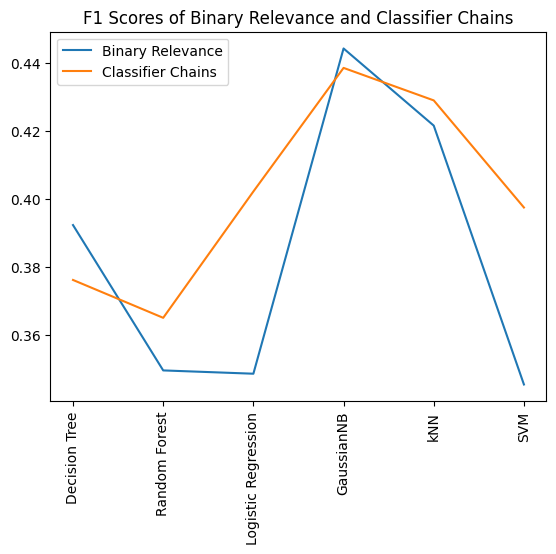

In [99]:
plt.plot(list(br_clf_f1.keys()), list(br_clf_f1.values()))
plt.plot(list(cc_f1.keys()), list(cc_f1.values()))
plt.xticks(rotation=90)
plt.title('F1 Scores of Binary Relevance and Classifier Chains')
plt.legend(['Binary Relevance', 'Classifier Chains'])

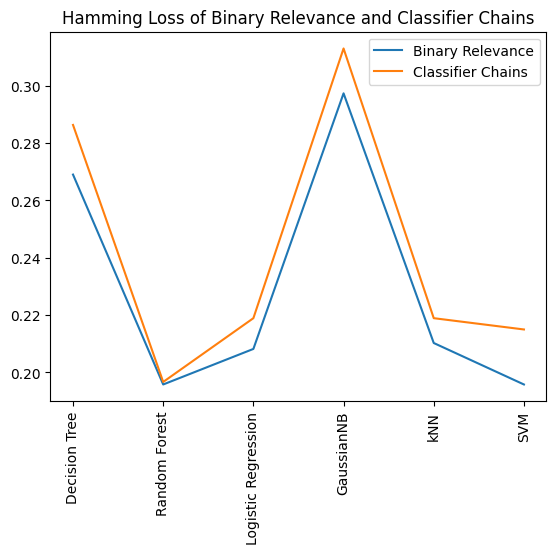

In [100]:
plt.plot(list(br_clf_hamming_loss.keys()), list(br_clf_hamming_loss.values()))
plt.plot(list(cc_hammings.keys()), list(cc_hammings.values()))
plt.xticks(rotation=90)
plt.title('Hamming Loss of Binary Relevance and Classifier Chains')
plt.legend(['Binary Relevance', 'Classifier Chains'])

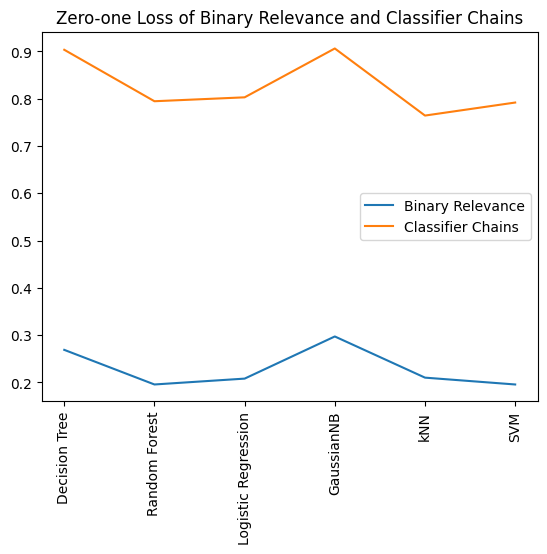

In [101]:
plt.plot(list(br_clf_zero_one_loss.keys()), list(br_clf_zero_one_loss.values()))
plt.plot(list(cc_01.keys()), list(cc_01.values()))
plt.xticks(rotation=90)
plt.title('Zero-one Loss of Binary Relevance and Classifier Chains')
plt.legend(['Binary Relevance', 'Classifier Chains'])

In [116]:
table = PrettyTable()

column_names = ['Binary Relevance'] + list(br_clf_accuracies.keys())

table.field_names = column_names

table.add_row(['Accuracy'] + [f"{br_clf_accuracies[key]:.6f}" for key in br_clf_accuracies.keys()])
table.add_row(['F1 Score'] + [f"{br_clf_f1[key]:.6f}" for key in br_clf_accuracies.keys()])
table.add_row(['Hamming Loss'] + [f"{br_clf_hamming_loss[key]:.6f}" for key in br_clf_accuracies.keys()])
table.add_row(['Zero-One Loss'] + [f"{br_clf_zero_one_loss[key]:.6f}" for key in br_clf_accuracies.keys()])

table.border = False  # 启用边框
table.header = True  # 显示表头
print(table)

 Binary Relevance  Decision Tree  Random Forest  Logistic Regression  GaussianNB    kNN       SVM    
     Accuracy         0.731010       0.804210          0.791810        0.702680   0.789750  0.804210 
     F1 Score         0.392296       0.349576          0.348606        0.444197   0.421524  0.345443 
   Hamming Loss       0.268989       0.195789          0.208186        0.297324   0.210252  0.195789 
  Zero-One Loss       0.268990       0.195790          0.208190        0.297320   0.210250  0.195790 


In [119]:
import csv

with open('D:/c++_code/模式识别与机器学习/大作业/table_data.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    csvwriter.writerow(table.field_names)
    
    for row in table._rows:
        csvwriter.writerow(row)

In [118]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import io

table_str = table.get_string()

font = ImageFont.load_default()  # 加载默认字体
image = Image.new('RGB', (800, 200), color = (255, 255, 255))
draw = ImageDraw.Draw(image)
draw.text((10, 10), table_str, fill=(0, 0, 0), font=font)

image.save('table_image.png')

In [117]:
table_cc = PrettyTable()

column_names_cc = ['Classifier Chains'] + list(cc_accuracies.keys())

table_cc.field_names = column_names_cc

table_cc.add_row(['Accuracy'] + [f"{cc_accuracies[key]:.6f}" for key in cc_accuracies.keys()])
table_cc.add_row(['F1 Score'] + [f"{cc_f1[key]:.6f}" for key in cc_accuracies.keys()])
table_cc.add_row(['Hamming Loss'] + [f"{cc_hammings[key]:.6f}" for key in cc_accuracies.keys()])
table_cc.add_row(['Zero-One Loss'] + [f"{cc_01[key]:.6f}" for key in cc_accuracies.keys()])

table_cc.border = False
table_cc.header = True
print(table_cc)

 Classifier Chains  Decision Tree  Random Forest  Logistic Regression  GaussianNB    kNN       SVM    
      Accuracy         0.713700       0.803330          0.781090        0.687030   0.781090  0.785030 
      F1 Score         0.376162       0.365035          0.402165        0.438487   0.428937  0.397461 
    Hamming Loss       0.286305       0.196675          0.218910        0.312967   0.218910  0.214974 
   Zero-One Loss       0.903581       0.794766          0.803030        0.906336   0.764463  0.792011 


In [120]:
import csv

with open('D:/c++_code/模式识别与机器学习/大作业/table_data1.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    csvwriter.writerow(table_cc.field_names)
    
    for row in table._rows:
        csvwriter.writerow(row)